In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# The zip object packs each array into a tuple. 
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | manono
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | beringovskiy
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | grindavik
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | evensk
Processing Record 13 of Set 1 | binucayan
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | kichera
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | waingapu
Processing Record 21 of Set 1 | tsihombe
City not found. Skipping

Processing Record 35 of Set 4 | djambala
Processing Record 36 of Set 4 | bethel
Processing Record 37 of Set 4 | jumla
Processing Record 38 of Set 4 | dzhebariki-khaya
Processing Record 39 of Set 4 | gien
Processing Record 40 of Set 4 | pozo colorado
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | baykit
Processing Record 44 of Set 4 | yertsevo
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | kota
Processing Record 47 of Set 4 | mamallapuram
Processing Record 48 of Set 4 | chumikan
Processing Record 49 of Set 4 | half moon bay
Processing Record 50 of Set 4 | chekhov
Processing Record 1 of Set 5 | meyungs
City not found. Skipping...
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | kisangani
Processing Record 4 of Set 5 | waipawa
Processing Record 5 of Set 5 | sarny
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | dali
Processing Record 8 of Set 5 | lud

Processing Record 25 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 8 | coleraine
Processing Record 27 of Set 8 | haines junction
Processing Record 28 of Set 8 | san policarpo
Processing Record 29 of Set 8 | santa cruz
Processing Record 30 of Set 8 | hobbs
Processing Record 31 of Set 8 | gazli
Processing Record 32 of Set 8 | narsaq
Processing Record 33 of Set 8 | berlevag
Processing Record 34 of Set 8 | bose
Processing Record 35 of Set 8 | pokhvistnevo
Processing Record 36 of Set 8 | barmer
Processing Record 37 of Set 8 | beloha
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | terrace
Processing Record 40 of Set 8 | vostok
Processing Record 41 of Set 8 | longlac
City not found. Skipping...
Processing Record 42 of Set 8 | kandrian
Processing Record 43 of Set 8 | tazovskiy
Processing Record 44 of Set 8 | kachiry
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | annavasal
Processing Record 47 of Set 8 | billin

Processing Record 14 of Set 12 | porteirinha
Processing Record 15 of Set 12 | olinda
Processing Record 16 of Set 12 | camana
Processing Record 17 of Set 12 | ostrovnoy
Processing Record 18 of Set 12 | ayan
Processing Record 19 of Set 12 | cidreira
Processing Record 20 of Set 12 | ngaoundere
Processing Record 21 of Set 12 | sao felix do xingu
Processing Record 22 of Set 12 | tecoanapa
Processing Record 23 of Set 12 | vanimo
Processing Record 24 of Set 12 | svetlyy
Processing Record 25 of Set 12 | apatity
Processing Record 26 of Set 12 | noyabrsk
Processing Record 27 of Set 12 | yar-sale
Processing Record 28 of Set 12 | santa isabel do rio negro
Processing Record 29 of Set 12 | sonamukhi
Processing Record 30 of Set 12 | ghanzi
Processing Record 31 of Set 12 | masvingo
Processing Record 32 of Set 12 | impfondo
Processing Record 33 of Set 12 | natal
Processing Record 34 of Set 12 | anadyr
Processing Record 35 of Set 12 | kathmandu
Processing Record 36 of Set 12 | oktyabrskoye
Processing Re

In [10]:
len(city_data)

583

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-20.18,69,0,6.91,US,2022-02-02 17:22:47
1,Manono,-7.3000,27.4167,71.01,96,100,3.06,CD,2022-02-02 17:22:54
2,Punta Arenas,-53.1500,-70.9167,53.71,66,75,10.36,CL,2022-02-02 17:22:55
3,Beringovskiy,63.0500,179.3167,-2.20,84,43,19.33,RU,2022-02-02 17:22:55
4,Yellowknife,62.4560,-114.3525,-35.72,78,40,6.91,CA,2022-02-02 17:19:10
5,Busselton,-33.6500,115.3333,68.04,52,99,20.89,AU,2022-02-02 17:20:12
6,Vaini,-21.2000,-175.2000,73.56,100,40,1.14,TO,2022-02-02 17:22:56
7,Kapaa,22.0752,-159.3190,67.12,83,100,1.01,US,2022-02-02 17:22:46
8,Grindavik,63.8424,-22.4338,30.15,63,40,11.50,IS,2022-02-02 17:22:57
9,Khatanga,71.9667,102.5000,-38.51,98,50,1.52,RU,2022-02-02 17:22:57


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643823716.668648

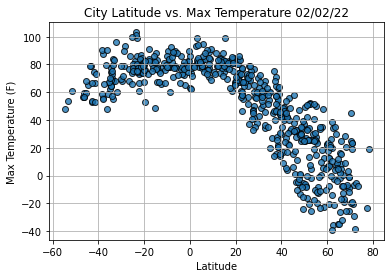

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

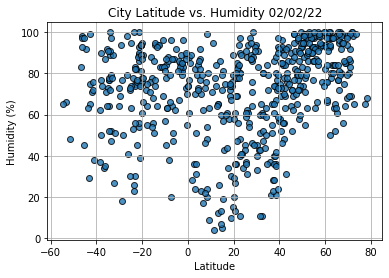

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


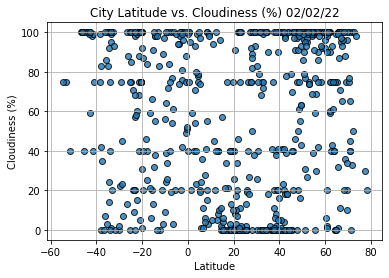

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

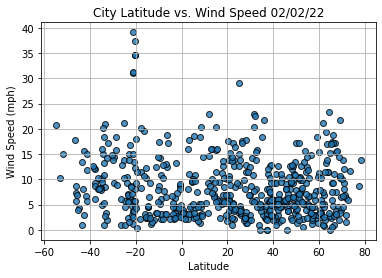

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                    47.82
Humidity                       65
Cloudiness                     75
Wind Speed                  20.71
Country                        AR
Date          2022-02-02 17:19:55
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

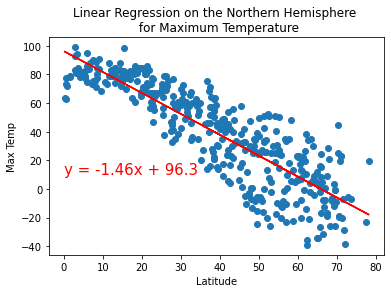

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,10))

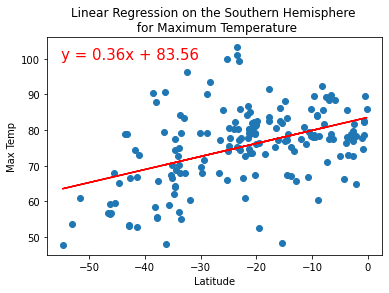

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,100))

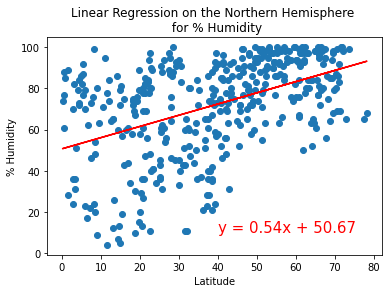

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


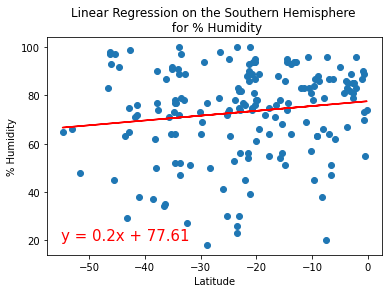

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,20))


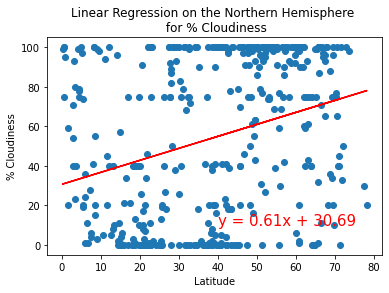

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))


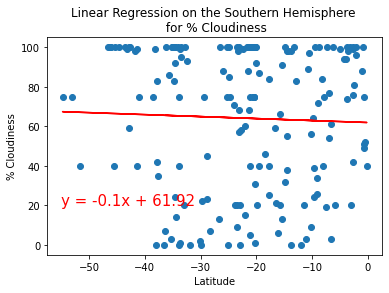

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,20))


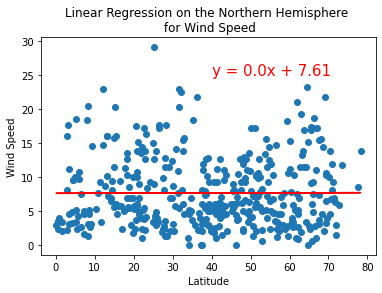

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

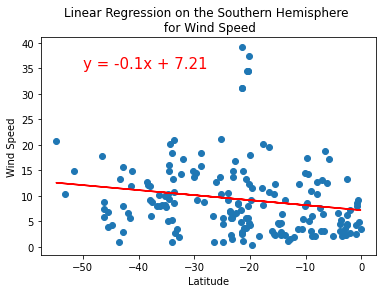

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
